# Stock Price Prediction Using Linear Regression at Widhya

## __Author: Soma Dey__

### 1. Importing the dataset and all required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#Load the data into a pandas dataFrame
df= pd.read_csv("C:/Users/SOMA/Documents/Python_Projects/Widhya/EOD-AAPL.csv")

In [3]:
#Read the dataset
df.head() #printing first 5 records of the dataset

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,41.006118,41.209949,40.881421,41.025302,65920748.0
1,2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,40.790296,40.953361,40.696773,40.910197,85992852.0
2,2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,40.958157,41.118825,40.689340,40.903003,132742144.0
3,2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,41.888589,42.067001,41.845424,41.967723,65397776.0
4,2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,41.766290,42.209923,41.749504,41.967723,83799584.0


In [4]:
#Now printing last 5 records of the dataset
df.tail()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
1085,2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,15.945715,16.037916,15.897720,15.982659,340687200.0
1086,2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,15.738579,15.768260,15.470501,15.731632,359525600.0
1087,2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,15.795731,15.809308,15.587016,15.638484,236367600.0
1088,2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,15.773944,15.858566,15.670375,15.746504,345032800.0
1089,2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,15.569965,15.806782,15.388405,15.427243,331928800.0


In [5]:
#Finding how many features are there in the dataset
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split',
       'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume'],
      dtype='object')

In [6]:
df.shape

(1090, 13)

+ **This Stock Price Prediction dataset has 1090 rows and 13 columns**

### 2. Exploratory Data Analysis

In [7]:
#here we use describe() method so that we can able to see percentiles,mean,std,max,count of the given dataset.
df.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,194.564537,196.114735,193.016676,194.613130,3.605114e+07,0.015642,1.005505,26.283677,26.493692,26.068855,26.289305,1.931334e+08
std,160.562848,161.812898,159.407381,160.647536,2.194473e+07,0.175122,0.181735,6.593449,6.619745,6.557756,6.595409,1.112891e+08
min,90.000000,90.700000,89.470000,90.280000,5.704900e+06,0.000000,1.000000,14.144639,14.515653,14.121273,14.212842,4.590369e+07
25%,108.042500,108.942500,106.972500,108.007500,2.120714e+07,0.000000,1.000000,22.099713,22.362631,21.879019,22.130410,1.133450e+08
50%,121.585000,122.504950,120.640000,121.755000,3.248325e+07,0.000000,1.000000,25.699500,25.972960,25.430346,25.707787,1.681963e+08
75%,156.905000,157.809625,155.744975,156.515000,4.673778e+07,0.000000,1.000000,29.235805,29.448022,29.041285,29.269451,2.394642e+08
max,649.900000,651.260000,644.470000,647.350000,1.895606e+08,3.290000,7.000000,41.991703,42.492889,41.931753,42.305844,1.065523e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1090 non-null   object 
 1   Open        1090 non-null   float64
 2   High        1090 non-null   float64
 3   Low         1090 non-null   float64
 4   Close       1090 non-null   float64
 5   Volume      1090 non-null   float64
 6   Dividend    1090 non-null   float64
 7   Split       1090 non-null   float64
 8   Adj_Open    1090 non-null   float64
 9   Adj_High    1090 non-null   float64
 10  Adj_Low     1090 non-null   float64
 11  Adj_Close   1090 non-null   float64
 12  Adj_Volume  1090 non-null   float64
dtypes: float64(12), object(1)
memory usage: 110.8+ KB


In [9]:
#Here the dependant variable is 'btc_market_price' because we need to predict the price of bitcons.
#Finding which feature correlate with the dependant variable.
df.corr()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Open,1.000000,0.999948,0.999935,0.999866,-0.547597,0.088894,-0.019234,-0.534445,-0.537418,-0.531829,-0.534399,0.502054
High,0.999948,1.000000,0.999941,0.999944,-0.545893,0.088582,-0.019154,-0.535283,-0.538038,-0.532575,-0.534990,0.504125
Low,0.999935,0.999941,1.000000,0.999949,-0.550156,0.089065,-0.019259,-0.533844,-0.536724,-0.530960,-0.533517,0.498174
Close,0.999866,0.999944,0.999949,1.000000,-0.548315,0.088610,-0.019044,-0.534448,-0.537173,-0.531552,-0.533903,0.500617
Volume,-0.547597,-0.545893,-0.550156,-0.548315,1.000000,-0.061064,0.054382,0.085888,0.095572,0.071723,0.081938,0.337092
Dividend,0.088894,0.088582,0.089065,0.088610,-0.061064,1.000000,-0.002708,-0.050353,-0.051215,-0.050306,-0.051095,0.002395
Split,-0.019234,-0.019154,-0.019259,-0.019044,0.054382,-0.002708,1.000000,-0.024993,-0.024640,-0.025124,-0.023978,0.029564
Adj_Open,-0.534445,-0.535283,-0.533844,-0.534448,0.085888,-0.050353,-0.024993,1.000000,0.999528,0.999416,0.998987,-0.549990
Adj_High,-0.537418,-0.538038,-0.536724,-0.537173,0.095572,-0.051215,-0.024640,0.999528,1.000000,0.999278,0.999526,-0.544404
Adj_Low,-0.531829,-0.532575,-0.530960,-0.531552,0.071723,-0.050306,-0.025124,0.999416,0.999278,1.000000,0.999558,-0.560073


### 3. Data Visualization

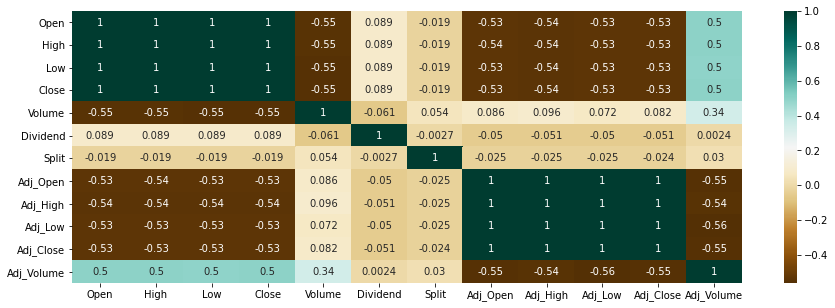

In [10]:
#Visualizing the Correlation between all features
plt.figure(figsize=(15,5))
a= df.corr()
sns.heatmap(a,cmap='BrBG',annot=True)
plt.show()

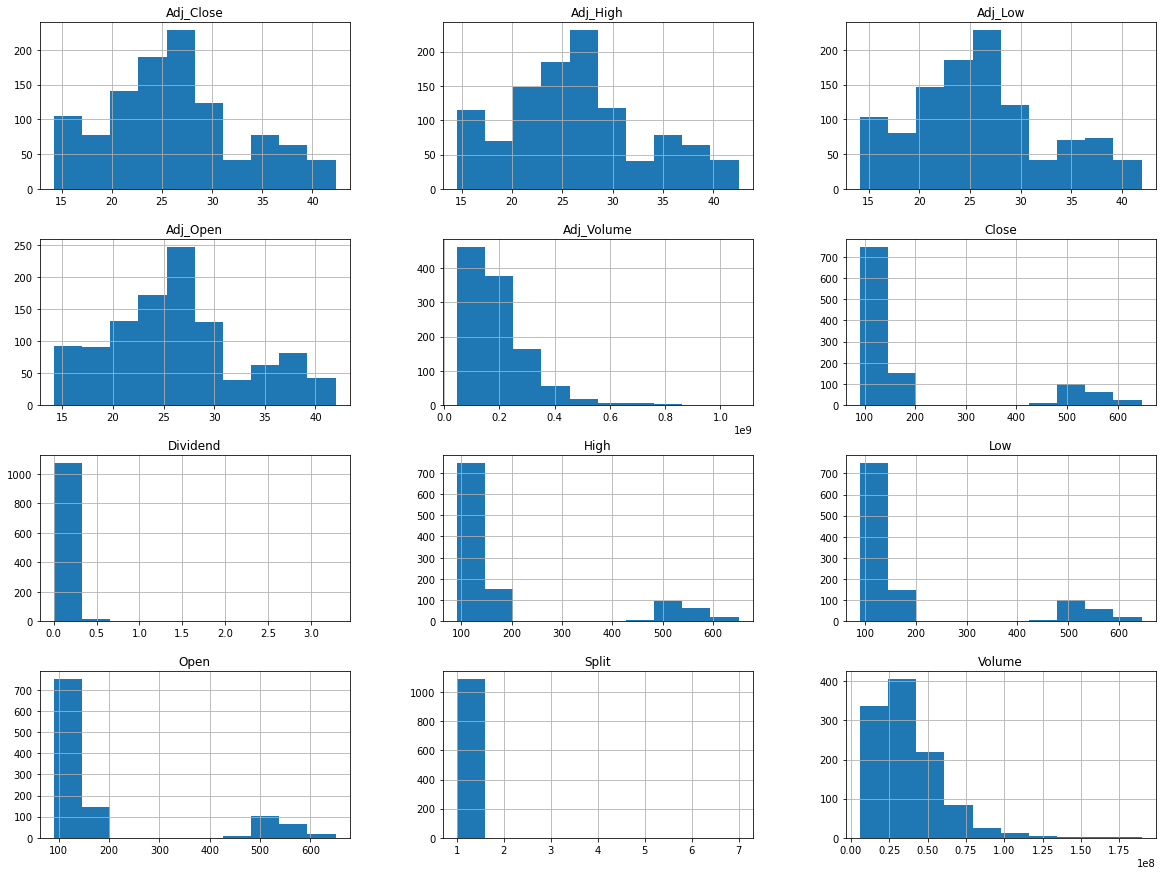

In [11]:
df.hist(figsize=(20,15))
plt.show()

### 4. Data Pre-processing

In [12]:
#Handling Missing Values
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Dividend      0
Split         0
Adj_Open      0
Adj_High      0
Adj_Low       0
Adj_Close     0
Adj_Volume    0
dtype: int64

+ **There is no missing value present in this dataset.**

+ **Here in our Stock Price dataset having both the regular columns and adjusted columns is redundant.**

+ **Adjusted columns are the most ideal ones.**

+ **Regular columns here are prices on the day, but stocks have things called stock splits, where suddenly 1 share becomes something like 2 shares, thus the value of a share is halved, but the value of the company has not halved.**

+ **Adjusted columns are adjusted for stock splits over time, which makes them more reliable for doing analysis.**

In [13]:
#Now we go ahead and pair down our original dataframe a bit:

df = df[['Adj_Open',  'Adj_High',  'Adj_Low',  'Adj_Close', 'Adj_Volume']]

In [14]:
#This creates a new column that is the % spread based on the closing price, which is our crude measure of volatility.

df['HL_PCT'] = (df['Adj_High'] - df['Adj_Low']) / df['Adj_Close'] * 100.0

#This creates a new column that is the daily % change.

df['PCT_change'] = (df['Adj_Close'] - df['Adj_Open']) / df['Adj_Open'] * 100.0

In [15]:
#Now we will define a new dataframe as below:

df = df[['Adj_Close', 'HL_PCT', 'PCT_change', 'Adj_Volume']]

print(df.head())

   Adj_Close    HL_PCT  PCT_change   Adj_Volume
0  41.025302  0.800795    0.046784   65920748.0
1  40.910197  0.627198    0.293945   85992852.0
2  40.903003  1.050009   -0.134660  132742144.0
3  41.967723  0.527970    0.188917   65397776.0
4  41.967723  1.097080    0.482287   83799584.0


### 5. Preparing the dataset

+ **Now we define the forecasting column and fill any NaN data with -99999.**

+ **Finally, we define what we want to forecast out.**

+ **Here we want to forecast out 1% of the entire length of the dataset.**

In [16]:
forecast_col = 'Adj_Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))

In [17]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [18]:
#Now we'll drop any NaN information from the dataframe:

df.dropna(inplace=True)

+ **Here we will divide the dataset into attributes (input) and labels (output). Then we will split the dataset into two parts - Testing data and Training data**

In [19]:
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

In [20]:
X.shape

(1079, 4)

In [21]:
y.shape

(1079,)

### 6. Splitting dataset into training and test set

In [22]:
#spliting the data into training and testing data. The ratio of this data is 20% (Test data) and 80% (Train Data)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size=0.2)

### 7. Traning the Algorithm

In [23]:
print("X train.shape =", X_train.shape)
print("y train.shape =", y_train.shape)
print("X test.shape  =", X_test.shape)
print("y test.shape  =", y_test.shape)

X train.shape = (863, 4)
y train.shape = (863,)
X test.shape  = (216, 4)
y test.shape  = (216,)


In [24]:
linreg=linear_model.LinearRegression()

In [25]:
# Here we use fit function to tell the algorithm on which data to work

linreg.fit(X_train,y_train)

LinearRegression()

In [26]:
#plotting the Regression Line (Y = MX + C)

Y0 = linreg.intercept_ + linreg.coef_*X_train

### 8. Predictions Making

In [27]:
#predicting the Scores for test data
y_predicted=linreg.predict(X_test)
print(y_predicted)

[25.94019346 22.08401602 28.14412034 26.39387059 28.87358525 16.84066879
 14.12412705 27.72760871 23.36408598 22.4976183  22.67305471 27.09465787
 24.94624742 17.00391389 28.35912049 27.2049852  24.69616916 23.81111611
 23.27419466 27.33978341 22.34580517 15.55615841 26.94586649 26.17705015
 40.53950008 39.99329646 25.64542989 26.04694542 23.51365928 16.91336268
 31.86184608 16.86612304 30.37611238 28.57506878 22.1296303  29.14230513
 33.23045162 39.55118178 17.23692647 23.81626297 21.94978265 21.75068409
 36.02644003 23.30513336 32.38268304 21.63445541 27.35614008 26.12108531
 28.92213104 28.7418526  28.11727647 25.49998501 23.26220697 25.52621996
 21.58628133 28.26887613 40.16196573 39.72183875 25.04971494 25.54086583
 32.87967976 26.85272091 22.12561118 25.1900928  22.80801679 16.51500831
 27.0654879  21.7255813  22.29564793 16.16666674 17.99248604 22.03378312
 38.47686044 17.35228814 37.12344128 24.87542189 33.3102814  21.6532492
 26.86770742 23.62634198 18.014401   23.72456301 17.

### 9. Comparing the Predicted Score with the Actual Score

In [31]:
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})  
df_compare

,Actual,Predicted
0,24.604220,25.940193
1,22.579107,22.084016
2,28.950364,28.144120
3,27.415810,26.393871
4,28.715644,28.873585
...,...,...
211,18.932671,18.958878
212,35.777130,36.427750
213,18.853116,19.055002
214,22.492287,23.446330


### 10. Evaluating the Model

In [32]:
# Finding the accuracy of the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_predicted))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test,y_predicted)))

Mean Absolute Error: 0.7627997911381633
Mean Squared Error: 0.9394869770337422
Root Mean Squared Error: 0.9692713639810795


## Thank You